# WeatherPy
----
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, *and a little common sense* to create a representative model of weather across world cities.

In [98]:
# Dependencies and Setup
from citipy import citipy
import numpy as np
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

## Generate Cities List
----
Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

In [83]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

456

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [84]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [85]:
# set up lists to hold reponse info
name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
date = []


# Loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval\n-----------------------')
tick = 1
tick_set = 1
for city in cities:
    print(f'Processing Record {tick} of Set {tick_set} | {city}')
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        if tick >= 50:
            tick = 1
            tick_set = tick_set + 1
            time.sleep(60)
        else:
             tick = tick + 1
    except:
        print(f'City not found. Skipping... {city}')


Beginning Data Retrieval
-----------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | pundaguitan
Processing Record 3 of Set 1 | tuzla
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | port-gentil
Processing Record 8 of Set 1 | vitoria da conquista
Processing Record 9 of Set 1 | lavrentiya
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping... taolanaro
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | tumannyy
City not found. Skipping... tumannyy
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping... mys shmidta
Processing Record 17 of Set 1 | georgetown
P

Processing Record 23 of Set 4 | souillac
Processing Record 24 of Set 4 | margate
Processing Record 25 of Set 4 | sao filipe
Processing Record 26 of Set 4 | zajecar
Processing Record 27 of Set 4 | sondrio
Processing Record 28 of Set 4 | port macquarie
Processing Record 29 of Set 4 | astana
Processing Record 30 of Set 4 | tanete
Processing Record 31 of Set 4 | oranjestad
Processing Record 32 of Set 4 | terra santa
Processing Record 33 of Set 4 | auki
Processing Record 34 of Set 4 | nome
Processing Record 35 of Set 4 | booue
Processing Record 36 of Set 4 | preobrazheniye
Processing Record 37 of Set 4 | vaitupu
City not found. Skipping... vaitupu
Processing Record 37 of Set 4 | victoria
Processing Record 38 of Set 4 | saint-leu
Processing Record 39 of Set 4 | quatre cocos
Processing Record 40 of Set 4 | nipawin
Processing Record 41 of Set 4 | gorno-chuyskiy
City not found. Skipping... gorno-chuyskiy
Processing Record 41 of Set 4 | sokoto
Processing Record 42 of Set 4 | banda aceh
Processin

Processing Record 37 of Set 7 | panji
Processing Record 38 of Set 7 | sinkat
City not found. Skipping... sinkat
Processing Record 38 of Set 7 | hay river
Processing Record 39 of Set 7 | port hedland
Processing Record 40 of Set 7 | codrington
Processing Record 41 of Set 7 | yenagoa
Processing Record 42 of Set 7 | okha
Processing Record 43 of Set 7 | ahipara
Processing Record 44 of Set 7 | bloemfontein
Processing Record 45 of Set 7 | bobon
Processing Record 46 of Set 7 | khorramshahr
Processing Record 47 of Set 7 | hulyaypole
Processing Record 48 of Set 7 | chaa-khol
City not found. Skipping... chaa-khol
Processing Record 48 of Set 7 | luanda
Processing Record 49 of Set 7 | kahului
Processing Record 50 of Set 7 | ponta delgada
Processing Record 1 of Set 8 | sukumo
Processing Record 2 of Set 8 | tasiilaq
Processing Record 3 of Set 8 | ofaqim
Processing Record 4 of Set 8 | bac giang
Processing Record 5 of Set 8 | buchanan
Processing Record 6 of Set 8 | tucuman
Processing Record 7 of Set 8 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
#create the data frame
city_df = pd.DataFrame({
    'City': name,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temp': temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind,
    'Date': date
})

# Output File (CSV)
output_data_file = "output_data/cities.csv"
city_df.to_csv(output_data_file)

#display sample of data frame
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Avarua,-21.2078,-159.7750,82.45,78,20,13.80,1644183575
1,Pundaguitan,6.3711,126.1689,80.13,77,86,17.74,1644183576
2,Tuzla,44.5428,18.6694,35.56,93,0,2.30,1644183576
3,Tuktoyaktuk,69.4541,-133.0374,-25.60,75,75,18.41,1644183540
4,Saskylakh,71.9167,114.0833,-23.28,100,96,2.37,1644183576


In [87]:
#describe stats of data frame, a step not mentioned in the instructions, but shown in the example anyway...
city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,4.160000e+02
mean,18.191645,14.320835,50.913365,74.254808,55.870192,8.379712,1.644184e+09
std,34.163747,90.994854,32.006885,20.376516,39.998343,6.190461,2.002446e+02
min,-54.800000,-175.200000,-40.220000,10.000000,0.000000,0.000000,1.644183e+09
25%,-10.217750,-64.768175,34.152500,65.000000,14.750000,3.600000,1.644184e+09
50%,20.601100,15.558500,63.715000,78.000000,66.000000,7.000000,1.644184e+09
75%,47.665625,100.340125,76.065000,90.000000,99.000000,11.500000,1.644184e+09
max,78.218600,179.316700,90.140000,100.000000,100.000000,44.740000,1.644184e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.
Do this even though it is not mentioned in the instructions, and there is no explaination in any of the course material as to why it is needed.

In [88]:
#skipping because it seems pointless

## Plotting the Data
----
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

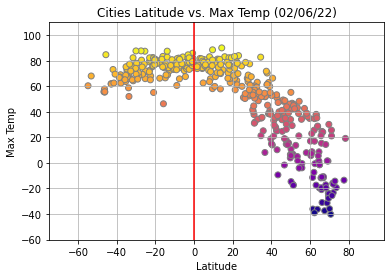

In [90]:
#create plot
x = 'Latitude'
y = 'Max Temp'

plt.scatter(city_df[x], city_df[y], c=city_df[y], cmap='plasma', edgecolor='grey')

plt.title(f"Cities {x} vs. {y} (02/06/22)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.75)

plt.xlabel(x)
plt.xlim(min(city_df[x])-20, max(city_df[x])+20)

plt.ylabel(y)
plt.ylim(min(city_df[y])-20, max(city_df[y])+20)

plt.axvline(x=0, color='r', linestyle='-',label='Equator')

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

Above plot shows that higher max temperatures occur nearer to the equator and below. This is logical considering it is winter in the Northern Hemisphere and summer in the Southern Hemisphere. 

#### Latitude vs. Humidity Plot

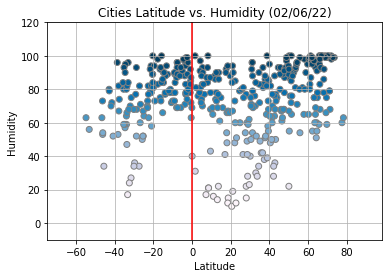

In [91]:
#create plot
x = 'Latitude'
y = 'Humidity'

plt.scatter(city_df[x], city_df[y], c=city_df[y], cmap='PuBu', edgecolor='grey')

plt.title(f"Cities {x} vs. {y} (02/06/22)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.75)

plt.xlabel(x)
plt.xlim(min(city_df[x])-20, max(city_df[x])+20)

plt.ylabel(y)
plt.ylim(min(city_df[y])-20, max(city_df[y])+20)

plt.axvline(x=0, color='r', linestyle='-',label='Equator')

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

Above plot shows that high humidity occurs slightly more often in the lower Latitudes.

#### Latitude vs. Cloudiness Plot

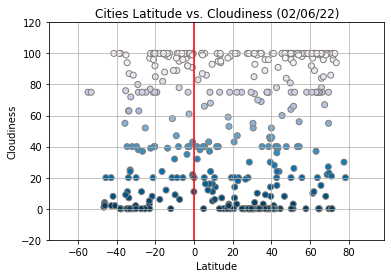

In [92]:
#create plot
x = 'Latitude'
y = 'Cloudiness'

plt.scatter(city_df[x], city_df[y], c=city_df[y]*-1, cmap='PuBu', edgecolor='grey')

plt.title(f"Cities {x} vs. {y} (02/06/22)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.75)

plt.xlabel(x)
plt.xlim(min(city_df[x])-20, max(city_df[x])+20)

plt.ylabel(y)
plt.ylim(min(city_df[y])-20, max(city_df[y])+20)

plt.axvline(x=0, color='r', linestyle='-',label='Equator')

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

Above plot shows that cloudiness is evenly spread across all latitudes

#### Latitude vs. Wind Speed Plot

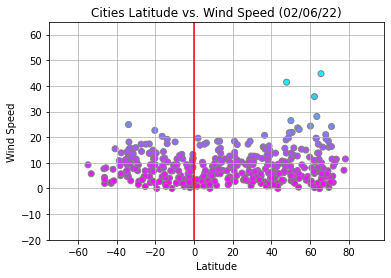

In [93]:
#create plot
x = 'Latitude'
y = 'Wind Speed'

plt.scatter(city_df[x], city_df[y], c=city_df[y]*-1, cmap='cool', edgecolor='grey')

plt.title(f"Cities {x} vs. {y} (02/06/22)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.75)

plt.xlabel(x)
plt.xlim(min(city_df[x])-20, max(city_df[x])+20)

plt.ylabel(y)
plt.ylim(min(city_df[y])-20, max(city_df[y])+20)

plt.axvline(x=0, color='r', linestyle='-',label='Equator')

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

Above plot shows wind speed is mostly evenly spread across all latitudes, with outliers at higher latitudes.

## Linear Regression

#### Northern Hemisphere - Max Temp vs. Latitutde Linear Regression

In [94]:
# Get subset of city data frame for northern hemisphere cities
city_NH = city_df[city_df['Latitude']>0]
city_NH.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,Pundaguitan,6.3711,126.1689,80.13,77,86,17.74,1644183576
2,Tuzla,44.5428,18.6694,35.56,93,0,2.30,1644183576
3,Tuktoyaktuk,69.4541,-133.0374,-25.60,75,75,18.41,1644183540
4,Saskylakh,71.9167,114.0833,-23.28,100,96,2.37,1644183576
5,Dikson,73.5069,80.5464,-19.32,99,94,11.43,1644183492


In [117]:
city_SH = city_df[city_df['Latitude']<0]
city_SH.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Avarua,-21.2078,-159.7750,82.45,78,20,13.80,1644183575
6,Port-Gentil,-0.7193,8.7815,80.08,82,22,11.63,1644183577
7,Vitória da Conquista,-14.8661,-40.8394,66.65,90,100,1.74,1644183577
10,Saint-Philippe,-21.3585,55.7679,78.35,81,100,13.15,1644183560
12,Vaini,-21.2000,-175.2000,77.16,94,75,14.97,1644183528


r-squared: -0.86


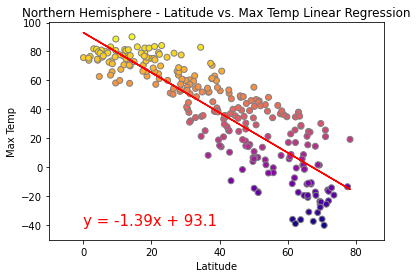

In [121]:
df = city_NH
x = 'Latitude'
y = 'Max Temp'

df_x = df[x]
df_y = df[y]

if df is city_NH:
    hem = 'Northern Hemisphere'
elif df is city_SH:
    hem = 'Southern Hemisphere'
else:
    print('no dataframe provided')

print(f"r-squared: {round(st.pearsonr(df[x], df[y])[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
regress_values = df[x] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(df[x], df[y], c=df[y], cmap='plasma', edgecolor='grey')
plt.plot(df[x],regress_values,"r-")

plt.annotate(line_eq,(0,-40),fontsize=15,color="red")

plt.title(f'{hem} - {x} vs. {y} Linear Regression')

plt.xlabel(x)
plt.xlim(min(df_x)-10, max(df_x)+10)

plt.ylabel(y)
plt.ylim(min(df_y)-10, max(df_y)+10)

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

Above plot shows a negative correlation between between latitude and max temperature in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.51


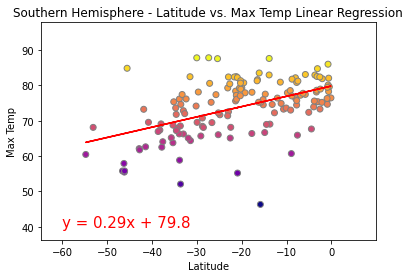

In [122]:
df = city_SH
x = 'Latitude'
y = 'Max Temp'

df_x = df[x]
df_y = df[y]

if df is city_NH:
    hem = 'Northern Hemisphere'
elif df is city_SH:
    hem = 'Southern Hemisphere'
else:
    print('no dataframe provided')

print(f"r-squared: {round(st.pearsonr(df[x], df[y])[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
regress_values = df[x] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(df[x], df[y], c=df[y], cmap='plasma', edgecolor='grey')
plt.plot(df[x],regress_values,"r-")

plt.annotate(line_eq,(-60,40),fontsize=15,color="red")

plt.title(f'{hem} - {x} vs. {y} Linear Regression')

plt.xlabel(x)
plt.xlim(min(df_x)-10, max(df_x)+10)

plt.ylabel(y)
plt.ylim(min(df_y)-10, max(df_y)+10)

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

Above plot shows a positive correlation between between latitude and max temperature in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.33


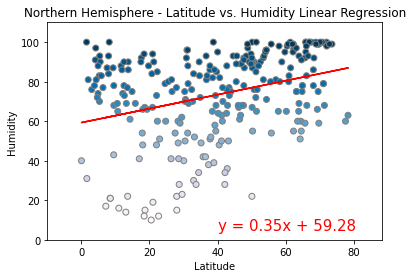

In [127]:
df = city_NH
x = 'Latitude'
y = 'Humidity'

df_x = df[x]
df_y = df[y]

if df is city_NH:
    hem = 'Northern Hemisphere'
elif df is city_SH:
    hem = 'Southern Hemisphere'
else:
    print('no dataframe provided')

print(f"r-squared: {round(st.pearsonr(df[x], df[y])[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
regress_values = df[x] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(df[x], df[y], c=df[y], cmap='PuBu', edgecolor='grey')
plt.plot(df[x],regress_values,"r-")

plt.annotate(line_eq,(40,5),fontsize=15,color="red")

plt.title(f'{hem} - {x} vs. {y} Linear Regression')

plt.xlabel(x)
plt.xlim(min(df_x)-10, max(df_x)+10)

plt.ylabel(y)
plt.ylim(min(df_y)-10, max(df_y)+10)

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

Above plot shows a positive correlation between between latitude and humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.46


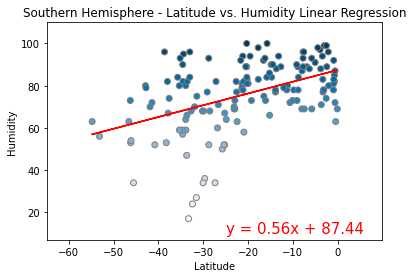

In [130]:
df = city_SH
x = 'Latitude'
y = 'Humidity'

df_x = df[x]
df_y = df[y]

if df is city_NH:
    hem = 'Northern Hemisphere'
elif df is city_SH:
    hem = 'Southern Hemisphere'
else:
    print('no dataframe provided')

print(f"r-squared: {round(st.pearsonr(df[x], df[y])[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
regress_values = df[x] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(df[x], df[y], c=df[y], cmap='PuBu', edgecolor='grey')
plt.plot(df[x],regress_values,"r-")

plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.title(f'{hem} - {x} vs. {y} Linear Regression')

plt.xlabel(x)
plt.xlim(min(df_x)-10, max(df_x)+10)

plt.ylabel(y)
plt.ylim(min(df_y)-10, max(df_y)+10)

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

Above plot shows a positive correlation between latitude and humidity in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.25


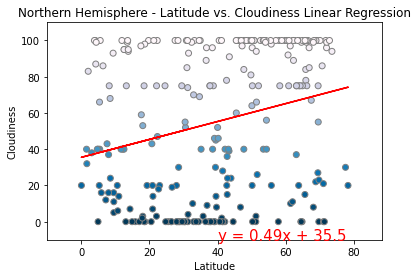

In [135]:
df = city_NH
x = 'Latitude'
y = 'Cloudiness'

df_x = df[x]
df_y = df[y]

if df is city_NH:
    hem = 'Northern Hemisphere'
elif df is city_SH:
    hem = 'Southern Hemisphere'
else:
    print('no dataframe provided')

print(f"r-squared: {round(st.pearsonr(df[x], df[y])[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
regress_values = df[x] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(df[x], df[y], c=df[y]*-1, cmap='PuBu', edgecolor='grey')
plt.plot(df[x],regress_values,"r-")

plt.annotate(line_eq,(40,-10),fontsize=15,color="red")

plt.title(f'{hem} - {x} vs. {y} Linear Regression')

plt.xlabel(x)
plt.xlim(min(df_x)-10, max(df_x)+10)

plt.ylabel(y)
plt.ylim(min(df_y)-10, max(df_y)+10)

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

Above plot shows a very weak (if any) positive correlation between latitude and cloudiness in the Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.42


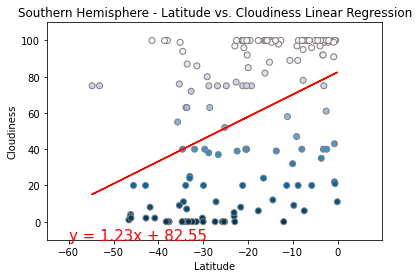

In [140]:
df = city_SH
x = 'Latitude'
y = 'Cloudiness'

df_x = df[x]
df_y = df[y]

if df is city_NH:
    hem = 'Northern Hemisphere'
elif df is city_SH:
    hem = 'Southern Hemisphere'
else:
    print('no dataframe provided')

print(f"r-squared: {round(st.pearsonr(df[x], df[y])[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
regress_values = df[x] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(df[x], df[y], c=df[y]*-1, cmap='PuBu', edgecolor='grey')
plt.plot(df[x],regress_values,"r-")

plt.annotate(line_eq,(-60,-10),fontsize=15,color="red")

plt.title(f'{hem} - {x} vs. {y} Linear Regression')

plt.xlabel(x)
plt.xlim(min(df_x)-10, max(df_x)+10)

plt.ylabel(y)
plt.ylim(min(df_y)-10, max(df_y)+10)

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

The above plot shows a very weak (if any) correlation between latitude and cloudiness in the Southern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.13


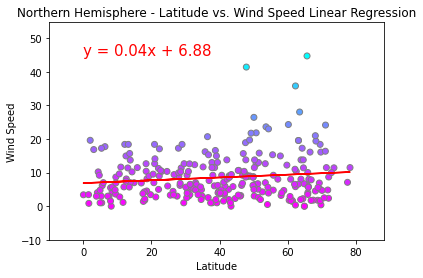

In [143]:
df = city_NH
x = 'Latitude'
y = 'Wind Speed'

df_x = df[x]
df_y = df[y]

if df is city_NH:
    hem = 'Northern Hemisphere'
elif df is city_SH:
    hem = 'Southern Hemisphere'
else:
    print('no dataframe provided')

print(f"r-squared: {round(st.pearsonr(df[x], df[y])[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
regress_values = df[x] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(df[x], df[y], c=df[y]*-1, cmap='cool', edgecolor='grey')
plt.plot(df[x],regress_values,"r-")

plt.annotate(line_eq,(0,45),fontsize=15,color="red")

plt.title(f'{hem} - {x} vs. {y} Linear Regression')

plt.xlabel(x)
plt.xlim(min(df_x)-10, max(df_x)+10)

plt.ylabel(y)
plt.ylim(min(df_y)-10, max(df_y)+10)

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

Above plot shows very very weak (if any) correlation between latitude and wind speed in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.18


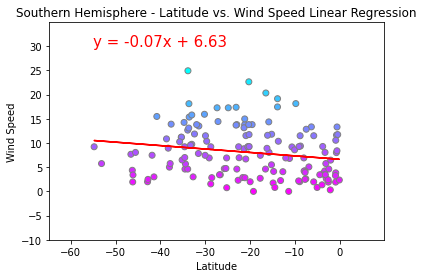

In [145]:
df = city_SH
x = 'Latitude'
y = 'Wind Speed'

df_x = df[x]
df_y = df[y]

if df is city_NH:
    hem = 'Northern Hemisphere'
elif df is city_SH:
    hem = 'Southern Hemisphere'
else:
    print('no dataframe provided')

print(f"r-squared: {round(st.pearsonr(df[x], df[y])[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
regress_values = df[x] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(df[x], df[y], c=df[y]*-1, cmap='cool', edgecolor='grey')
plt.plot(df[x],regress_values,"r-")

plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

plt.title(f'{hem} - {x} vs. {y} Linear Regression')

plt.xlabel(x)
plt.xlim(min(df_x)-10, max(df_x)+10)

plt.ylabel(y)
plt.ylim(min(df_y)-10, max(df_y)+10)

# Save plot as .pngs
plt.savefig(f"images/Cities {x} vs {y}.png")

The Above plot shows a very very weak (if any) correlation between latitude and wind speed in the Southern Hemisphere.